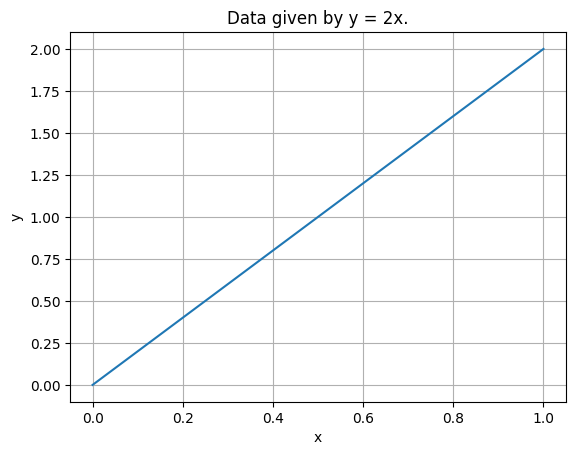

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Define arbitrarly x
x = np.linspace(0, 1, 10)
y = 2 * x

# Visualize the data
plt.plot(x, y, '-')
plt.title("Data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

[-0.02411774 -0.171315   -0.20038094  0.06146914 -0.19495456 -0.39765213
 -0.22488912 -0.0065959  -0.39379931 -0.2733722 ]


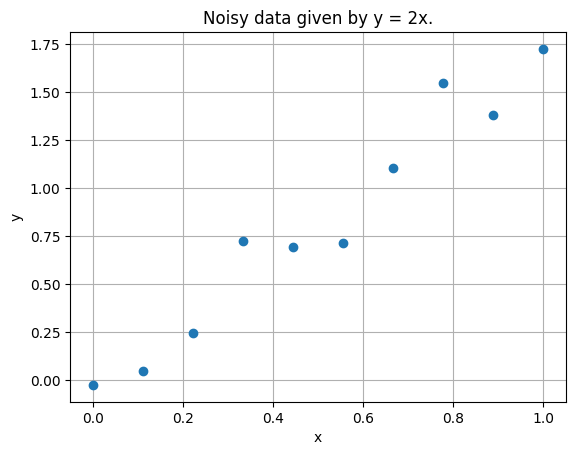

In [35]:
# Consider a little bit of noise
noise = np.random.normal(loc=0, scale=0.2, size=y.shape)
y_noisy = y + noise
print(noise)
# Visualize the noisy data
plt.plot(x, y_noisy, 'o')
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [22]:
def f(x, theta):
    return theta[0] + theta[1] * x

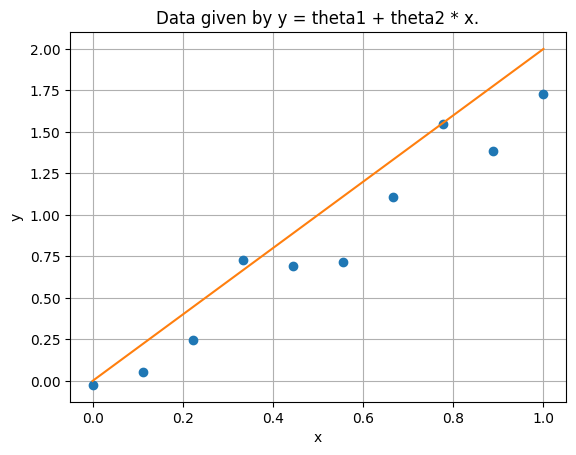

In [38]:
theta = [0, 2]

# Visualize the noisy data
plt.plot(x, y_noisy, 'o')
plt.plot(x, f(x, theta), '-')
plt.title("Data given by y = theta1 + theta2 * x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

theta value with np.lingalg.solve [-0.07637366  1.78762577]
theta value with Cholskey & Triangular solve [-0.07637366  1.78762577]


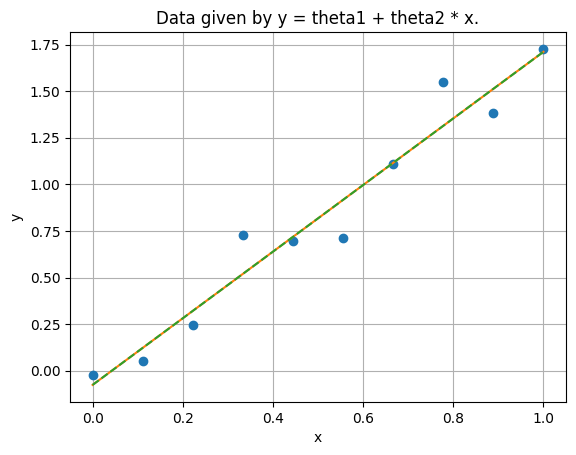

In [50]:
# Given x and y_noisy, define X and Y matrices
N = x.shape[0]

X = np.ones((2, N))
X[1] = x
Y = y_noisy

# Solve Normal Equation XX^T theta = XY, use solve and cholesky with triangular
theta1 = np.linalg.solve(X @ X.T, X@Y)
print(f"theta value with np.lingalg.solve {theta1}")

L = np.linalg.cholesky(X @ X.T)
z = scipy.linalg.solve_triangular(L, X @ Y, lower=True)
theta2 = scipy.linalg.solve_triangular(L.T, z, lower=False)

print(f"theta value with Cholskey & Triangular solve {theta2}")

# Visualize the noisy data
plt.plot(x, y_noisy, 'o')
plt.plot(x, f(x, theta1), '-')
plt.plot(x, f(x, theta2), '--')
plt.title("Data given by y = theta1 + theta2 * x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [94]:
def linear_regression(z, y):
    # Given x and y_noisy, define X and Y matrices
    N = x.shape[0]

    X = np.ones((2, N))
    X[1] = x
    Y = y

    # Solve Normal Equation XX^T theta = XY, use solve and cholesky with triangular
    theta1 = np.linalg.solve(X @ X.T, X@Y)
    print(f"theta value with np.lingalg.solve {theta1}")

    L = np.linalg.cholesky(X @ X.T)
    z = scipy.linalg.solve_triangular(L, X @ Y, lower=True)
    theta2 = scipy.linalg.solve_triangular(L.T, z, lower=False)

    print(f"theta value with Cholskey & Triangular solve {theta2}")

    # Visualize the noisy data
    plt.plot(x, y, 'o')
    plt.plot(x, f(x, theta1), '-')
    plt.plot(x, f(x, theta2), '--')
    plt.title("Data given by y = theta1 + theta2 * x.")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

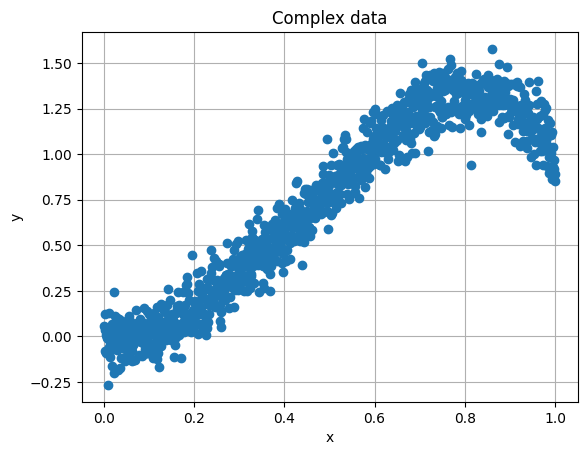

theta value with np.lingalg.solve [-0.07426977  1.6109367 ]
theta value with Cholskey & Triangular solve [-0.07426977  1.6109367 ]


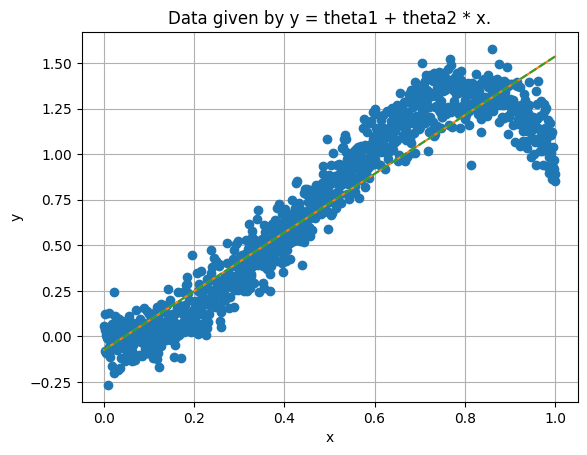

In [107]:
import pandas as pd

# Load data
data = pd.read_csv("poly_regression_large.csv")
x, y = data["x"], data["y"]

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Complex data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

linear_regression(x, y)

In [96]:
def vandermonde(x, K):
    N = len(x)
    phiX = np.zeros((K, N))
    
    for j in range(K):
        phiX[j, :] = x**j
    
    return phiX

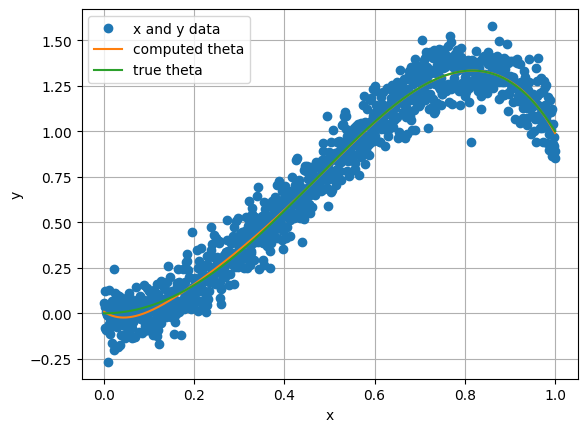

In [110]:
# Load data
k = 8
phiX = vandermonde(x, K=k)
Y = y

def f(x, theta):
    y = 0
    for j in range(len(theta)):
        y = y + theta[j] * x**j

    return y


L = np.linalg.cholesky(phiX @ phiX.T)
z = scipy.linalg.solve_triangular(L, phiX @ Y, lower=True)
theta = scipy.linalg.solve_triangular(L.T, z, lower=False)
theta_true = [0, 0, 4, 0, -3]

 # Visualize the noisy data
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta), '-')
plt.plot(x, f(x, theta_true), '-')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['x and y data','computed theta', 'true theta'])
plt.grid()
plt.show()